In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as sms
import seaborn as sns
import math


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [16]:
df = pd.read_excel("C:/Users/csmoralesg/Documents/UDLA/ProyectoFinal.xlsx")
df.head()

,area,Sexo,Edad,RelacionParentesco,EstadoCivil,Asiste_a_clases,RazonParaNoAsistir,NivelInstruccion,Como_se_considera,TrabajoLaSemanaPasada,Ingreso per cápita
0,1,0,64,1,4,1,1,2,6,0,512.5
1,1,1,31,3,6,1,5,8,6,1,512.5
2,1,0,64,1,4,1,11,4,6,0,620
3,1,1,32,3,6,1,3,6,6,1,620
4,1,0,72,1,6,1,1,4,3,0,100


In [17]:
df.drop('RazonParaNoAsistir', axis= 1, inplace=True)
#df.drop('NivelInstruccion', axis= 1, inplace=True)


In [18]:
df.rename({'Ingreso per cápita': 'ingr_per'}, axis = 1, inplace=True)
print(df)

        area  Sexo  Edad  RelacionParentesco EstadoCivil  Asiste_a_clases  \
0          1     0    64                   1           4                1   
1          1     1    31                   3           6                1   
2          1     0    64                   1           4                1   
3          1     1    32                   3           6                1   
4          1     0    72                   1           6                1   
...      ...   ...   ...                 ...         ...              ...   
336445     1     1    48                   1           1                1   
336446     1     0    46                   2           1                1   
336447     1     1    21                   3           6                0   
336448     1     1    16                   3           6                0   
336449     1     1    46                   1           2                1   

        NivelInstruccion  Como_se_considera  TrabajoLaSemanaPasada ingr_per

In [19]:
filtro_edad = (df['Edad'] >=5) & (df['Edad'] <=24)
filtro_instr = df['NivelInstruccion'] > 1

df1 = df[ filtro_edad & filtro_instr]
print(df1)

        area  Sexo  Edad  RelacionParentesco EstadoCivil  Asiste_a_clases  \
8          1     0    22                   3           6                1   
11         1     0    22                   3           6                1   
14         1     0    15                   3           6                0   
17         1     1    24                   7           5                1   
18         1     1    22                   7           6                1   
...      ...   ...   ...                 ...         ...              ...   
336438     1     1     9                   3                            0   
336441     1     0    10                   3                            0   
336444     1     0    10                   3                            0   
336447     1     1    21                   3           6                0   
336448     1     1    16                   3           6                0   

        NivelInstruccion  Como_se_considera  TrabajoLaSemanaPasada    ingr_

In [20]:
df1.dtypes

area                      int64
Sexo                      int64
Edad                      int64
RelacionParentesco        int64
EstadoCivil              object
Asiste_a_clases           int64
NivelInstruccion          int64
Como_se_considera         int64
TrabajoLaSemanaPasada     int64
ingr_per                 object
dtype: object

In [21]:
df1['ingr_per'] = pd.to_numeric(df1['ingr_per'], errors='coerce')
df1['EstadoCivil'] = pd.to_numeric(df1['EstadoCivil'], errors='coerce')
#df1['RazonParaNoAsistir'] = pd.to_numeric(df1['RazonParaNoAsistir'], errors='coerce')

C:\Users\csmoralesg\AppData\Local\Temp\ipykernel_26776\3035793931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ingr_per'] = pd.to_numeric(df1['ingr_per'], errors='coerce')


In [22]:
df1.drop('NivelInstruccion', axis= 1, inplace=True)
df1.drop('TrabajoLaSemanaPasada', axis= 1, inplace=True)

C:\Users\csmoralesg\AppData\Local\Temp\ipykernel_26776\2467618195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('NivelInstruccion', axis= 1, inplace=True)
C:\Users\csmoralesg\AppData\Local\Temp\ipykernel_26776\2467618195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('TrabajoLaSemanaPasada', axis= 1, inplace=True)


In [23]:
# Calcula la cantidad de datos perdidos por variable
missing_data = df1.isnull().sum()

# Calcula el porcentaje de datos perdidos por variable
missing_percentage = (missing_data / len(df1)) * 100

# Crea un DataFrame con la información recopilada
summary = pd.DataFrame({
    'Datos Perdidos': missing_data,
    'Porcentaje Perdido': missing_percentage
})

# Imprime el resumen
print(summary)

                    Datos Perdidos  Porcentaje Perdido
area                             0            0.000000
Sexo                             0            0.000000
Edad                             0            0.000000
RelacionParentesco               0            0.000000
EstadoCivil                  37347           30.603014
Asiste_a_clases                  0            0.000000
Como_se_considera                0            0.000000
ingr_per                       464            0.380213


In [24]:
df1.dtypes

area                    int64
Sexo                    int64
Edad                    int64
RelacionParentesco      int64
EstadoCivil           float64
Asiste_a_clases         int64
Como_se_considera       int64
ingr_per              float64
dtype: object

In [25]:
num_relleno =6
df1['EstadoCivil'] = df1['EstadoCivil'].fillna(num_relleno)
print(df1)

        area  Sexo  Edad  RelacionParentesco  EstadoCivil  Asiste_a_clases  \
8          1     0    22                   3          6.0                1   
11         1     0    22                   3          6.0                1   
14         1     0    15                   3          6.0                0   
17         1     1    24                   7          5.0                1   
18         1     1    22                   7          6.0                1   
...      ...   ...   ...                 ...          ...              ...   
336438     1     1     9                   3          6.0                0   
336441     1     0    10                   3          6.0                0   
336444     1     0    10                   3          6.0                0   
336447     1     1    21                   3          6.0                0   
336448     1     1    16                   3          6.0                0   

        Como_se_considera    ingr_per  
8                      

C:\Users\csmoralesg\AppData\Local\Temp\ipykernel_26776\1975319035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['EstadoCivil'] = df1['EstadoCivil'].fillna(num_relleno)


In [26]:
# Calcula la cantidad de datos perdidos por variable
missing_data = df1.isnull().sum()

# Calcula el porcentaje de datos perdidos por variable
missing_percentage = (missing_data / len(df1)) * 100

# Crea un DataFrame con la información recopilada
summary = pd.DataFrame({
    'Datos Perdidos': missing_data,
    'Porcentaje Perdido': missing_percentage
})

# Imprime el resumen
print(summary)

                    Datos Perdidos  Porcentaje Perdido
area                             0            0.000000
Sexo                             0            0.000000
Edad                             0            0.000000
RelacionParentesco               0            0.000000
EstadoCivil                      0            0.000000
Asiste_a_clases                  0            0.000000
Como_se_considera                0            0.000000
ingr_per                       464            0.380213


In [27]:
df1['ingr_per'].fillna(219.28, inplace=True)

C:\Users\csmoralesg\AppData\Local\Temp\ipykernel_26776\2654831005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ingr_per'].fillna(219.28, inplace=True)


In [28]:
# Calcula la cantidad de datos perdidos por variable
missing_data = df1.isnull().sum()

# Calcula el porcentaje de datos perdidos por variable
missing_percentage = (missing_data / len(df1)) * 100

# Crea un DataFrame con la información recopilada
summary = pd.DataFrame({
    'Datos Perdidos': missing_data,
    'Porcentaje Perdido': missing_percentage
})

# Imprime el resumen
print(summary)

                    Datos Perdidos  Porcentaje Perdido
area                             0                 0.0
Sexo                             0                 0.0
Edad                             0                 0.0
RelacionParentesco               0                 0.0
EstadoCivil                      0                 0.0
Asiste_a_clases                  0                 0.0
Como_se_considera                0                 0.0
ingr_per                         0                 0.0


In [29]:
# Estadísticos descriptivos para variables cuantitativas
desc_cuantitativas = df1[['Edad', 'ingr_per']].describe()


# Imprimir resultados
print("Estadísticos descriptivos para variables cuantitativas:")
print(desc_cuantitativas)


Estadísticos descriptivos para variables cuantitativas:
                Edad       ingr_per
count  122037.000000  122037.000000
mean       14.904390     219.278019
std         5.478294     238.095208
min         5.000000       0.285714
25%        10.000000      88.333333
50%        15.000000     154.600000
75%        20.000000     267.500000
max        24.000000   17031.333330


In [30]:
df1.dtypes

area                    int64
Sexo                    int64
Edad                    int64
RelacionParentesco      int64
EstadoCivil           float64
Asiste_a_clases         int64
Como_se_considera       int64
ingr_per              float64
dtype: object

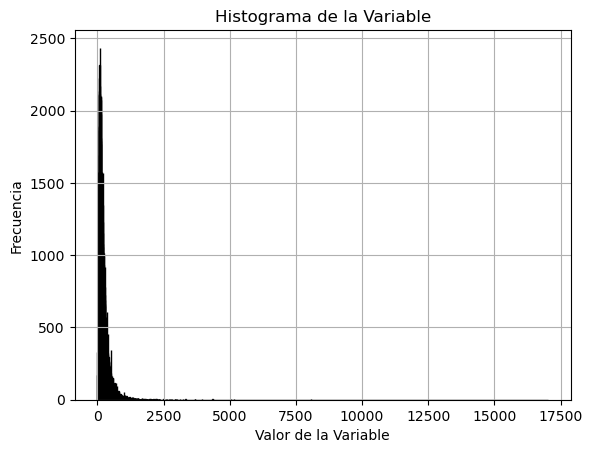

In [73]:
# Crear el histograma
plt.hist(df1['ingr_per'], bins=4000, color='blue', edgecolor='black')

# Personalizar el gráfico
plt.title('Histograma de la Variable')
plt.xlabel('Valor de la Variable')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar el gráfico
plt.show()

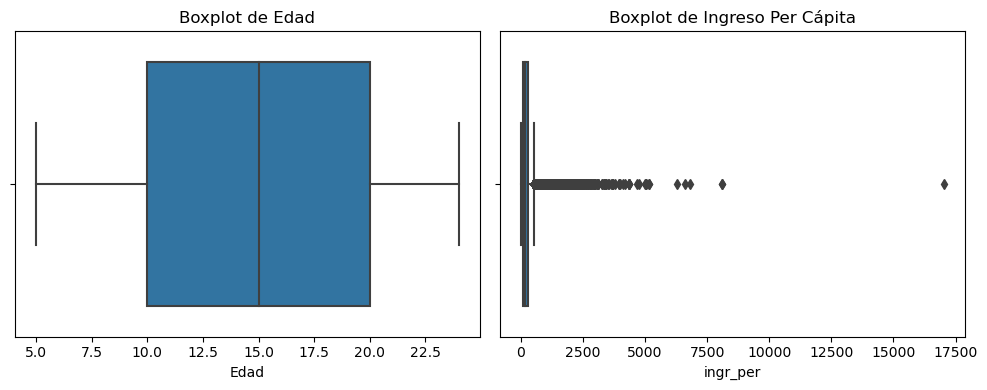

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico de caja y bigotes para la edad
sns.boxplot(x=df1['Edad'], ax=axs[0])
axs[0].set_title('Boxplot de Edad')

# Gráfico de caja y bigotes para ingr_per
sns.boxplot(x=df1['ingr_per'], ax=axs[1])
axs[1].set_title('Boxplot de Ingreso Per Cápita')

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

In [31]:
# Calcular el rango intercuartílico (IQR)
Q1 = df1['ingr_per'].quantile(0.25)
Q3 = df1['ingr_per'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar datos atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Contar el número de datos atípicos
outliers_count = len(df1[(df1['ingr_per'] < lower_limit) | (df1['ingr_per'] > upper_limit)])

# Calcular el porcentaje de datos atípicos
percentage_outliers = (outliers_count / len(df1)) * 100

print(f'Porcentaje de datos atípicos: {percentage_outliers:.4f}%')

Porcentaje de datos atípicos: 6.5701%


In [32]:
# Calcular el rango intercuartílico (IQR)
Q1 = df1['ingr_per'].quantile(0.25)
Q3 = df1['ingr_per'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar datos atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Contar el número de datos atípicos
outliers_count = len(df1[(df1['ingr_per'] < lower_limit) | (df1['ingr_per'] > upper_limit)])

# Calcular el porcentaje de datos atípicos
percentage_outliers = (outliers_count / len(df1)) * 100

# Imprimir resultados
print(f'Cuartil 1 (Q1): {Q1:.4f}')
print(f'Cuartil 3 (Q3): {Q3:.4f}')
print(f'Rango intercuartílico (IQR): {IQR:.4f}')
print(f'Límite inferior para datos atípicos: {lower_limit:.4f}')
print(f'Límite superior para datos atípicos: {upper_limit:.4f}')
print(f'Porcentaje de datos atípicos: {percentage_outliers:.4f}%')

Cuartil 1 (Q1): 88.3333
Cuartil 3 (Q3): 267.5000
Rango intercuartílico (IQR): 179.1667
Límite inferior para datos atípicos: -180.4167
Límite superior para datos atípicos: 536.2500
Porcentaje de datos atípicos: 6.5701%


In [33]:
# Calcular el rango intercuartílico (IQR)
Q1 = df1['ingr_per'].quantile(0.25)
Q3 = df1['ingr_per'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar datos atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar los datos sin atípicos
df2 = df1[(df1['ingr_per'] >= lower_limit) & (df1['ingr_per'] <= upper_limit)]

# Imprimir el nuevo DataFrame sin datos atípicos
print(df2)

        area  Sexo  Edad  RelacionParentesco  EstadoCivil  Asiste_a_clases  \
8          1     0    22                   3          6.0                1   
11         1     0    22                   3          6.0                1   
14         1     0    15                   3          6.0                0   
17         1     1    24                   7          5.0                1   
18         1     1    22                   7          6.0                1   
...      ...   ...   ...                 ...          ...              ...   
336438     1     1     9                   3          6.0                0   
336441     1     0    10                   3          6.0                0   
336444     1     0    10                   3          6.0                0   
336447     1     1    21                   3          6.0                0   
336448     1     1    16                   3          6.0                0   

        Como_se_considera    ingr_per  
8                      

In [34]:
# Estadísticos descriptivos para variables cuantitativas
desc_cuantitativas = df2[['Edad', 'ingr_per']].describe()


# Imprimir resultados
print("Estadísticos descriptivos para variables cuantitativas:")
print(desc_cuantitativas)

Estadísticos descriptivos para variables cuantitativas:
                Edad       ingr_per
count  114019.000000  114019.000000
mean       14.862453     174.040069
std         5.452172     116.806026
min         5.000000       0.285714
25%        10.000000      84.750000
50%        15.000000     145.000000
75%        19.000000     238.000000
max        24.000000     536.250000


In [35]:

# Supongamos que df es tu DataFrame y 'nombre_columna' es el nombre de la columna que modificaste.
df2['ingr_per'].replace(219.28, None, inplace=True)

C:\Users\csmoralesg\AppData\Local\Temp\ipykernel_26776\2235896944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ingr_per'].replace(219.28, None, inplace=True)


In [36]:
# Calcula la cantidad de datos perdidos por variable
missing_data = df2.isnull().sum()

# Calcula el porcentaje de datos perdidos por variable
missing_percentage = (missing_data / len(df2)) * 100

# Crea un DataFrame con la información recopilada
summary = pd.DataFrame({
    'Datos Perdidos': missing_data,
    'Porcentaje Perdido': missing_percentage
})

# Imprime el resumen
print(summary)

                    Datos Perdidos  Porcentaje Perdido
area                             0             0.00000
Sexo                             0             0.00000
Edad                             0             0.00000
RelacionParentesco               0             0.00000
EstadoCivil                      0             0.00000
Asiste_a_clases                  0             0.00000
Como_se_considera                0             0.00000
ingr_per                       464             0.40695


In [37]:
df2['ingr_per'].fillna(174.04, inplace=True)

C:\Users\csmoralesg\AppData\Local\Temp\ipykernel_26776\3019652733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ingr_per'].fillna(174.04, inplace=True)


In [38]:
# Estadísticos descriptivos para variables cuantitativas
desc_cuantitativas = df2[['Edad', 'ingr_per']].describe()


# Imprimir resultados
print("Estadísticos descriptivos para variables cuantitativas:")
print(desc_cuantitativas)

Estadísticos descriptivos para variables cuantitativas:
                Edad       ingr_per
count  114019.000000  114019.000000
mean       14.862453     173.855965
std         5.452172     116.770223
min         5.000000       0.285714
25%        10.000000      84.750000
50%        15.000000     145.000000
75%        19.000000     238.000000
max        24.000000     536.250000


In [39]:
correlacion = df2[['Edad', 'ingr_per']].corr()
print(correlacion)

              Edad  ingr_per
Edad      1.000000  0.096532
ingr_per  0.096532  1.000000


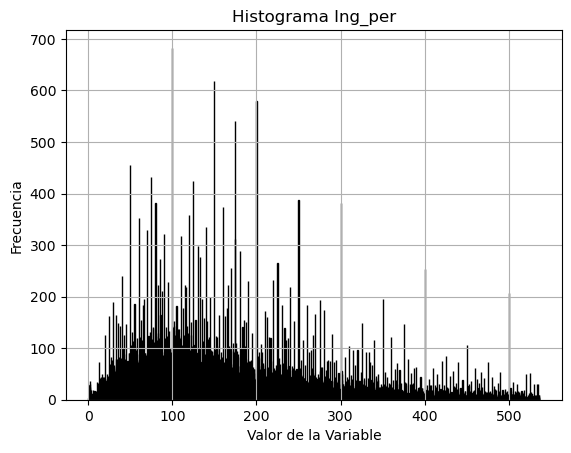

In [27]:
# Crear el histograma
plt.hist(df2['ingr_per'], bins=4000, color='blue', edgecolor='black')

# Personalizar el gráfico
plt.title('Histograma Ing_per')
plt.xlabel('Valor de la Variable')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar el gráfico
plt.show()

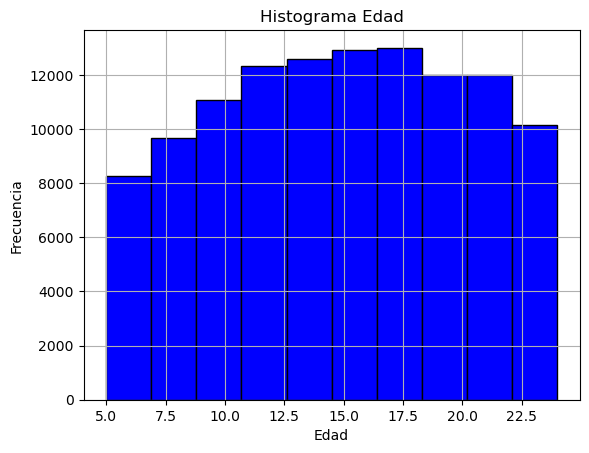

In [28]:
# Crear el histograma
plt.hist(df2['Edad'], bins=10, color='blue', edgecolor='black')

# Personalizar el gráfico
plt.title('Histograma Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar el gráfico
plt.show()


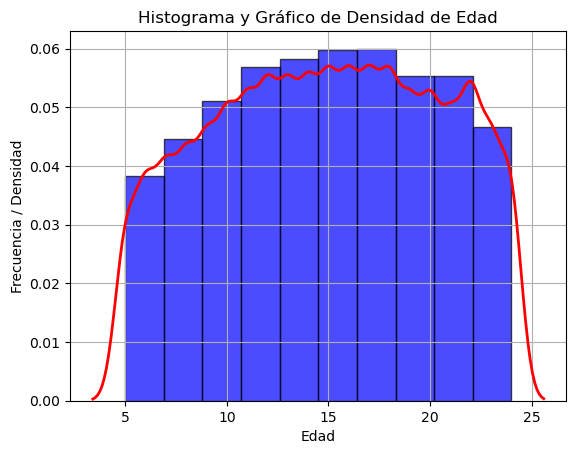

In [134]:
# Crear el histograma y la gráfica de densidad
plt.hist(df2['Edad'], bins=10, density=True, color='blue', edgecolor='black', alpha=0.7)
sns.kdeplot(df2['Edad'], color='red', linewidth=2)

# Personalizar el gráfico
plt.title('Histograma y Gráfico de Densidad de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia / Densidad')
plt.grid(True)

# Mostrar el gráfico
plt.show()

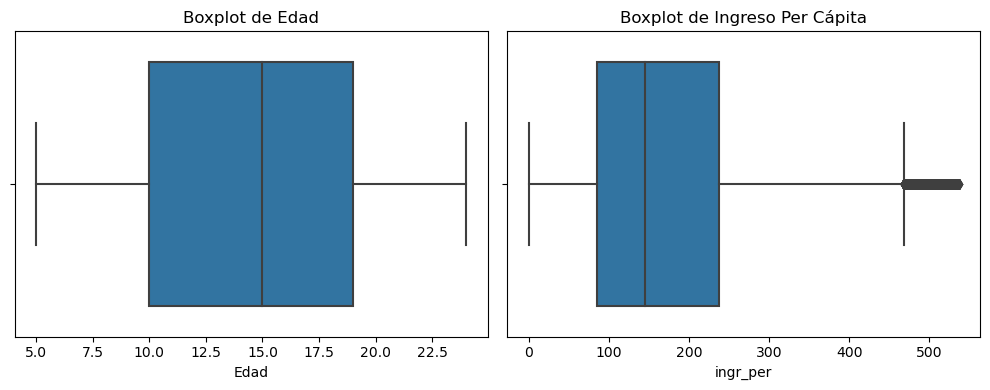

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico de caja y bigotes para la edad
sns.boxplot(x=df2['Edad'], ax=axs[0])
axs[0].set_title('Boxplot de Edad')

# Gráfico de caja y bigotes para ingr_per
sns.boxplot(x=df2['ingr_per'], ax=axs[1])
axs[1].set_title('Boxplot de Ingreso Per Cápita')

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

In [27]:
valores_perdidos = df2.isnull().sum()
print(valores_perdidos)

area                  0
Sexo                  0
Edad                  0
RelacionParentesco    0
EstadoCivil           0
Asiste_a_clases       0
Como_se_considera     0
ingr_per              0
dtype: int64


In [26]:
variables_cuantitativas = ['Edad','ingr_per']
describe = df2[variables_cuantitativas].describe()
print(describe)

                Edad       ingr_per
count  114019.000000  114019.000000
mean       14.862453     173.855965
std         5.452172     116.770223
min         5.000000       0.285714
25%        10.000000      84.750000
50%        15.000000     145.000000
75%        19.000000     238.000000
max        24.000000     536.250000


In [110]:
#df2['ingr_per'].fillna(value=df2['ingr_per'].mean(), inplace = True)
#print(df1)
# ya no se imputa porque al ver los datos atipicos y eliminarlos ya no hubieron datos perdidos

In [12]:
# razon para no asistir rellenar con el valor de 2 para la categoria "si asiste" ahora la categoria 2 se refiere a que si asiste

#num_relleno =2
#df1['RazonParaNoAsistir'] = df1['RazonParaNoAsistir'].fillna(num_relleno)
#print(df1)

In [29]:
valores_perdidos = df2.isnull().sum()
print(valores_perdidos)

area                  0
Sexo                  0
Edad                  0
RelacionParentesco    0
EstadoCivil           0
Asiste_a_clases       0
Como_se_considera     0
ingr_per              0
dtype: int64


In [27]:
df2.EstadoCivil = df2.EstadoCivil.astype(int)


C:\Users\csmoralesg\AppData\Local\Temp\ipykernel_13376\892436260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.EstadoCivil = df2.EstadoCivil.astype(int)


In [17]:
#df1.RazonParaNoAsistir = df1.RazonParaNoAsistir.astype(int)

In [28]:
variables_cuantitativas = ['Edad','ingr_per']
describe = df2[variables_cuantitativas].describe()
print(describe)

                Edad       ingr_per
count  114019.000000  114019.000000
mean       14.862453     173.855965
std         5.452172     116.770223
min         5.000000       0.285714
25%        10.000000      84.750000
50%        15.000000     145.000000
75%        19.000000     238.000000
max        24.000000     536.250000


In [83]:
df2.dtypes

area                    int64
Sexo                    int64
Edad                    int64
RelacionParentesco      int64
EstadoCivil             int32
Asiste_a_clases         int64
Como_se_considera       int64
ingr_per              float64
dtype: object

In [29]:
correlacion = df2[['Edad', 'ingr_per']].corr()
print(correlacion)

              Edad  ingr_per
Edad      1.000000  0.096532
ingr_per  0.096532  1.000000


In [30]:
# Calcular la tabla de frecuencias
tabla_frecuencias = pd.DataFrame(df2['Asiste_a_clases'].value_counts()).reset_index()
tabla_frecuencias.columns = ['Categoría', 'Frecuencia']

# Si deseas agregar porcentaje, puedes hacerlo así
tabla_frecuencias['Porcentaje (%)'] = (tabla_frecuencias['Frecuencia'] / len(df2)) * 100

# Mostrar la tabla de frecuencias
print(tabla_frecuencias)

   Categoría  Frecuencia  Porcentaje (%)
0          0       86322       75.708435
1          1       27697       24.291565


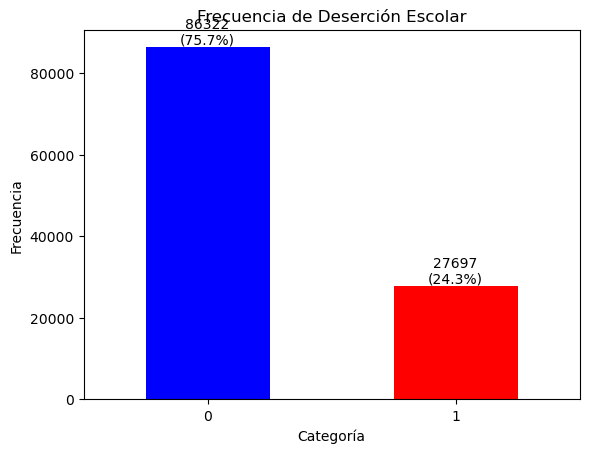

In [38]:
# Calcular la frecuencia y el porcentaje de cada categoría
frecuencia = df2['Asiste_a_clases'].value_counts()
porcentaje = df2['Asiste_a_clases'].value_counts(normalize=True) * 100

# Crear el gráfico de barras
ax = frecuencia.plot(kind='bar', color=['blue', 'red'])
plt.title('Frecuencia de Deserción Escolar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

# Mostrar el número y porcentaje en cada barra
for i, v in enumerate(frecuencia):
    ax.text(i, v + 0.1, f"{v}\n({porcentaje[i]:.1f}%)", ha='center', va='bottom')

plt.xticks(rotation=0)  # Girar las etiquetas del eje x si es necesario
plt.show()

In [33]:

# Calcular el porcentaje y el número de no desertores por edad
porcentaje_no_desertores = (df2.groupby('Edad')['Asiste_a_clases'].mean()) * 100
numero_no_desertores = df2.groupby('Edad')['Asiste_a_clases'].sum()

# Imprimir resumen
print("Resumen:")
print("Edad\tPorcentaje de No Desertores\tNúmero de No Desertores")
for edad, porcentaje, numero in zip(porcentaje_no_desertores.index, porcentaje_no_desertores, numero_no_desertores):
    print(f"{edad}\t{porcentaje:.2f}%\t\t\t{int(numero)}")

Resumen:
Edad	Porcentaje de No Desertores	Número de No Desertores
5	0.13%			5
6	0.47%			21
7	0.76%			36
8	0.71%			35
9	0.68%			36
10	0.69%			40
11	0.75%			45
12	1.34%			85
13	2.22%			139
14	3.62%			229
15	5.45%			353
16	7.11%			459
17	20.81%			1347
18	49.45%			3231
19	55.73%			3300
20	58.09%			3530
21	59.76%			3341
22	62.69%			4021
23	70.77%			3736
24	76.30%			3708


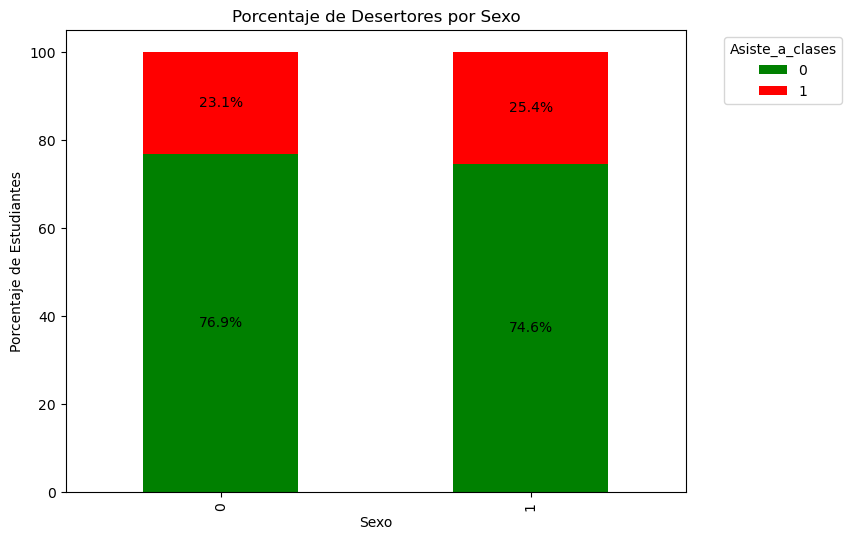

In [40]:


# Calcular porcentajes de desertores por sexo
porcentajes = df2.groupby('Sexo')['Asiste_a_clases'].value_counts(normalize=True).unstack() * 100

# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
porcentajes.plot(kind='bar', stacked=True, color=['green', 'red'], ax=ax)

# Mostrar porcentajes en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

# Configuraciones adicionales del gráfico
ax.set_title('Porcentaje de Desertores por Sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Porcentaje de Estudiantes')
ax.legend(title='Asiste_a_clases', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

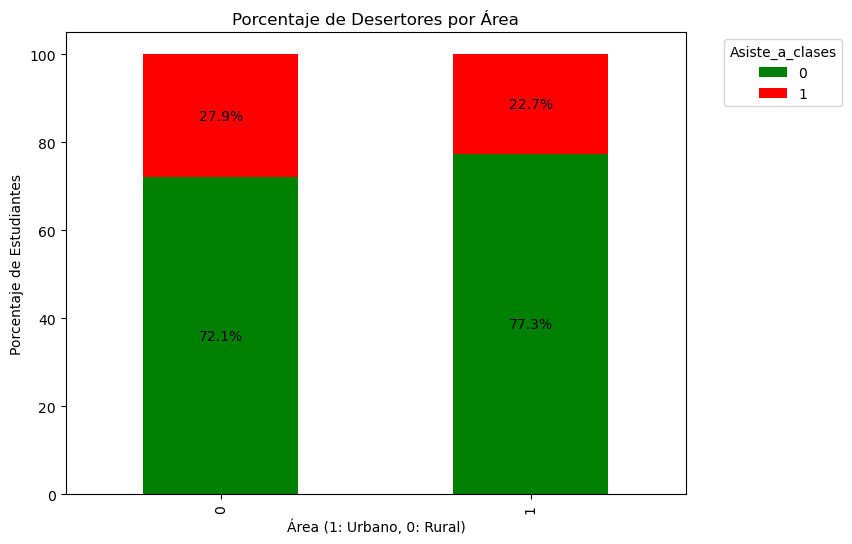

In [41]:
 #Calcular porcentajes de desertores por área
porcentajes_area = df2.groupby('area')['Asiste_a_clases'].value_counts(normalize=True).unstack() * 100

# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
porcentajes_area.plot(kind='bar', stacked=True, color=['green', 'red'], ax=ax)

# Mostrar porcentajes en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

# Configuraciones adicionales del gráfico
ax.set_title('Porcentaje de Desertores por Área')
ax.set_xlabel('Área (1: Urbano, 0: Rural)')
ax.set_ylabel('Porcentaje de Estudiantes')
ax.legend(title='Asiste_a_clases', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

In [34]:
# Calcular el porcentaje de cada categoría del EstadoCivil
porcentaje_por_categoria = df2['EstadoCivil'].value_counts(normalize=True) * 100

# Crear un DataFrame para mostrar los resultados
resumen = pd.DataFrame({
    'EstadoCivil': porcentaje_por_categoria.index,
    'Porcentaje': porcentaje_por_categoria.values
})

# Ordenar el DataFrame por la categoría de EstadoCivil
resumen = resumen.sort_values(by='EstadoCivil')

# Imprimir el resumen
print(resumen)

   EstadoCivil  Porcentaje
2            1    0.868276
3            2    0.836703
4            3    0.028065
5            4    0.021926
1            5    5.671862
0            6   92.573168


In [35]:
# Calcula el porcentaje de desertores y no desertores agrupando por EstadoCivil
resumen = df2.groupby('EstadoCivil')['Asiste_a_clases'].value_counts(normalize=True).unstack() * 100

# Renombra las columnas para mayor claridad
resumen.columns = ['No Desertor (%)', 'Desertor (%)']

# Llena los valores NaN con 0 (por si no hay datos en alguna categoría)
resumen = resumen.fillna(0)

# Muestra el resumen
print(resumen)

             No Desertor (%)  Desertor (%)
EstadoCivil                               
1                  16.161616     83.838384
2                  14.779874     85.220126
3                  31.250000     68.750000
4                  36.000000     64.000000
5                  15.354879     84.645121
6                  80.538318     19.461682


In [36]:
# Calcular el porcentaje de cada categoría del EstadoCivil
porcentaje_por_categoria = df2['Como_se_considera'].value_counts(normalize=True) * 100

# Crear un DataFrame para mostrar los resultados
resumen = pd.DataFrame({
    'Etnia': porcentaje_por_categoria.index,
    'Porcentaje': porcentaje_por_categoria.values
})

# Ordenar el DataFrame por la categoría de EstadoCivil
resumen = resumen.sort_values(by='Etnia')

# Imprimir el resumen
print(resumen)

   Etnia  Porcentaje
1      1    9.132688
3      2    1.779528
2      3    1.908454
4      4    1.259439
5      5    1.208571
0      6   83.943027
6      7    0.765662
7      8    0.002631


In [37]:
# Calcula el porcentaje de desertores y no desertores agrupando por EstadoCivil
resumen = df2.groupby('Como_se_considera')['Asiste_a_clases'].value_counts(normalize=True).unstack() * 100

# Renombra las columnas para mayor claridad
resumen.columns = ['No Desertor (%)', 'Desertor (%)']

# Llena los valores NaN con 0 (por si no hay datos en alguna categoría)
resumen = resumen.fillna(0)

# Muestra el resumen
print(resumen)

                   No Desertor (%)  Desertor (%)
Como_se_considera                               
1                        71.967733     28.032267
2                        74.519468     25.480532
3                        72.150735     27.849265
4                        73.050139     26.949861
5                        68.505080     31.494920
6                        76.436355     23.563645
7                        68.155785     31.844215
8                         0.000000    100.000000


In [38]:
# Calcular el porcentaje de cada categoría del relacion de parentesco
porcentaje_por_categoria = df2['RelacionParentesco'].value_counts(normalize=True) * 100

# Crear un DataFrame para mostrar los resultados
resumen = pd.DataFrame({
    'RelacionParentesco': porcentaje_por_categoria.index,
    'Porcentaje': porcentaje_por_categoria.values
})

# Ordenar el DataFrame por la categoría de EstadoCivil
resumen = resumen.sort_values(by='RelacionParentesco')

# Imprimir el resumen
print(resumen)

   RelacionParentesco  Porcentaje
3                   1    1.991773
4                   2    1.881265
0                   3   73.086065
5                   4    1.622537
1                   5   12.590884
2                   7    7.224235
6                   8    1.038423
7                   9    0.564818


In [39]:
# Calcula el porcentaje de desertores y no desertores agrupando por RelacionParentesco
resumen = df2.groupby('RelacionParentesco')['Asiste_a_clases'].value_counts(normalize=True).unstack() * 100

# Renombra las columnas para mayor claridad
resumen.columns = ['No Desertor (%)', 'Desertor (%)']

# Llena los valores NaN con 0 (por si no hay datos en alguna categoría)
resumen = resumen.fillna(0)

# Muestra el resumen
print(resumen)

                    No Desertor (%)  Desertor (%)
RelacionParentesco                               
1                         21.268164     78.731836
2                         15.664336     84.335664
3                         78.111650     21.888350
4                         17.945946     82.054054
5                         88.053775     11.946225
7                         74.408158     25.591842
8                         92.820946      7.179054
9                         32.608696     67.391304


C:\Users\csmoralesg\AppData\Local\Temp\ipykernel_19328\2604847044.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rango_ingreso'] = pd.cut(df2['ingr_per'], bins=rangos_ingreso, labels=etiquetas_rangos)


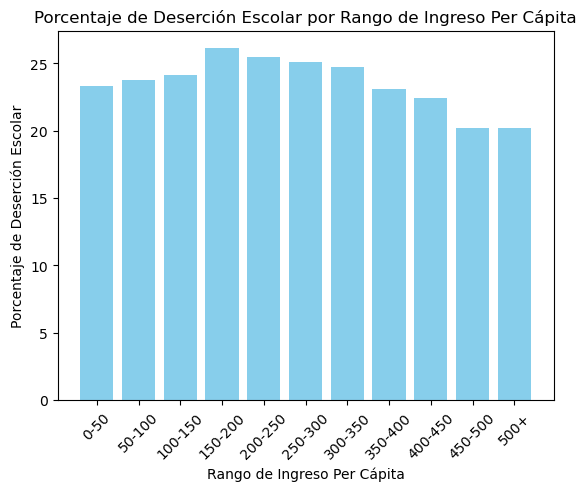

In [40]:
# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'ingr_per' y 'Asiste_a_clases'

# Define los límites de los rangos de ingreso (ajustados según tus datos)
rangos_ingreso = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
etiquetas_rangos = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500+']

# Agrupa los datos por rango de ingreso y calcula el porcentaje de deserción en cada rango
df2['Rango_ingreso'] = pd.cut(df2['ingr_per'], bins=rangos_ingreso, labels=etiquetas_rangos)
porcentaje_desercion_por_rango = df2.groupby('Rango_ingreso')['Asiste_a_clases'].mean() * 100

# Crea el gráfico de barras
plt.bar(porcentaje_desercion_por_rango.index, porcentaje_desercion_por_rango, color='skyblue')
plt.xlabel('Rango de Ingreso Per Cápita')
plt.ylabel('Porcentaje de Deserción Escolar')
plt.title('Porcentaje de Deserción Escolar por Rango de Ingreso Per Cápita')
plt.xticks(rotation=45)
plt.show()

In [50]:
# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'ingr_per' y 'Asiste_a_clases'

# Define los límites de los rangos de ingreso (ajustados según tus datos)
rangos_ingreso = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
etiquetas_rangos = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500+']

# Agrupa los datos por rango de ingreso y calcula el porcentaje de desertores y no desertores en cada rango
df2['Rango_ingreso'] = pd.cut(df2['ingr_per'], bins=rangos_ingreso, labels=etiquetas_rangos)
resumen_por_rango = df2.groupby('Rango_ingreso')['Asiste_a_clases'].value_counts(normalize=True).unstack() * 100

# Renombra las columnas para mayor claridad
resumen_por_rango.columns = ['No Desertor (%)', 'Desertor (%)']

# Llena los valores NaN con 0 (por si no hay datos en alguna categoría)
resumen_por_rango = resumen_por_rango.fillna(0)

# Muestra el resumen en forma de tabla
print(resumen_por_rango)

               No Desertor (%)  Desertor (%)
Rango_ingreso                               
0-50                 76.681317     23.318683
50-100               76.202092     23.797908
100-150              75.890031     24.109969
150-200              73.881171     26.118829
200-250              74.565994     25.434006
250-300              74.895007     25.104993
300-350              75.246038     24.753962
350-400              76.923077     23.076923
400-450              77.558177     22.441823
450-500              79.822078     20.177922
500+                 79.802582     20.197418


C:\Users\csmoralesg\AppData\Local\Temp\ipykernel_15968\331028407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rango_ingreso'] = pd.cut(df2['ingr_per'], bins=rangos_ingreso, labels=etiquetas_rangos)


C:\Users\csmoralesg\AppData\Local\Temp\ipykernel_21900\1923406436.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rango_ingreso'] = pd.cut(df2['ingr_per'], bins=rangos_ingreso, labels=etiquetas_rangos)


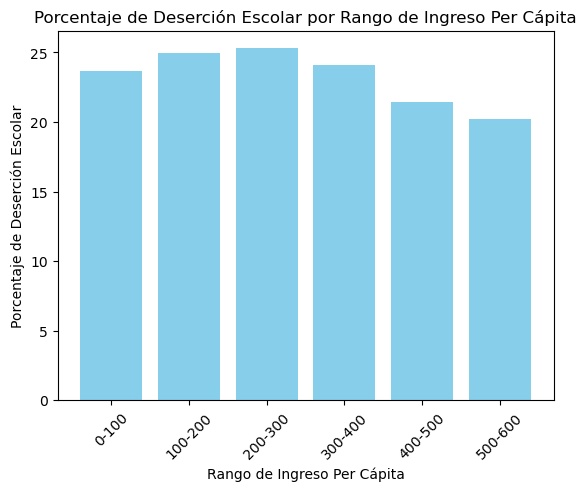

In [44]:
# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'ingr_per' y 'Asiste_a_clases'

# Define los límites de los rangos de ingreso (ajustados según tus datos)
rangos_ingreso = [0, 100, 200, 300, 400,  500, 600]
etiquetas_rangos = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600']

# Agrupa los datos por rango de ingreso y calcula el porcentaje de deserción en cada rango
df2['Rango_ingreso'] = pd.cut(df2['ingr_per'], bins=rangos_ingreso, labels=etiquetas_rangos)
porcentaje_desercion_por_rango = df2.groupby('Rango_ingreso')['Asiste_a_clases'].mean() * 100

# Crea el gráfico de barras
plt.bar(porcentaje_desercion_por_rango.index, porcentaje_desercion_por_rango, color='skyblue')
plt.xlabel('Rango de Ingreso Per Cápita')
plt.ylabel('Porcentaje de Deserción Escolar')
plt.title('Porcentaje de Deserción Escolar por Rango de Ingreso Per Cápita')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'ingr_per' y 'Asiste_a_clases'

# Define los límites de los rangos de ingreso (ajustados según tus datos)
rangos_ingreso = [0, 100, 200, 300, 400,  500, 600]
etiquetas_rangos = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600']

# Agrupa los datos por rango de ingreso y calcula el porcentaje de desertores y no desertores en cada rango
df2['Rango_ingreso'] = pd.cut(df2['ingr_per'], bins=rangos_ingreso, labels=etiquetas_rangos)
resumen_por_rango = df2.groupby('Rango_ingreso')['Asiste_a_clases'].value_counts(normalize=True).unstack() * 100

# Renombra las columnas para mayor claridad
resumen_por_rango.columns = ['No Desertor (%)', 'Desertor (%)']

# Llena los valores NaN con 0 (por si no hay datos en alguna categoría)
resumen_por_rango = resumen_por_rango.fillna(0)

# Muestra el resumen en forma de tabla
print(resumen_por_rango)

               No Desertor (%)  Desertor (%)
Rango_ingreso                               
0-100                76.361530     23.638470
100-200              75.040024     24.959976
200-300              74.702829     25.297171
300-400              75.943074     24.056926
400-500              78.556150     21.443850
500-600              79.802582     20.197418


C:\Users\csmoralesg\AppData\Local\Temp\ipykernel_21900\775012418.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rango_ingreso'] = pd.cut(df2['ingr_per'], bins=rangos_ingreso, labels=etiquetas_rangos)


In [40]:
X = df2.drop('Asiste_a_clases', axis=1)
y = df2['Asiste_a_clases']

In [41]:
print(X)

        area  Sexo  Edad  RelacionParentesco  EstadoCivil  Como_se_considera  \
8          1     0    22                   3          6.0                  6   
11         1     0    22                   3          6.0                  6   
14         1     0    15                   3          6.0                  6   
17         1     1    24                   7          5.0                  6   
18         1     1    22                   7          6.0                  6   
...      ...   ...   ...                 ...          ...                ...   
336438     1     1     9                   3          6.0                  6   
336441     1     0    10                   3          6.0                  6   
336444     1     0    10                   3          6.0                  6   
336447     1     1    21                   3          6.0                  6   
336448     1     1    16                   3          6.0                  6   

          ingr_per  
8       216.666667

In [42]:
print(df2)

        area  Sexo  Edad  RelacionParentesco  EstadoCivil  Asiste_a_clases  \
8          1     0    22                   3          6.0                1   
11         1     0    22                   3          6.0                1   
14         1     0    15                   3          6.0                0   
17         1     1    24                   7          5.0                1   
18         1     1    22                   7          6.0                1   
...      ...   ...   ...                 ...          ...              ...   
336438     1     1     9                   3          6.0                0   
336441     1     0    10                   3          6.0                0   
336444     1     0    10                   3          6.0                0   
336447     1     1    21                   3          6.0                0   
336448     1     1    16                   3          6.0                0   

        Como_se_considera    ingr_per  
8                      

In [43]:
#conjunto de datos en 75% entrenamiento y 25% test o prueba es lo real
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [44]:
#entrenamiento del arbol de decision
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth= 5, min_samples_leaf= 1, min_samples_split= 2, random_state=0)
classifier.fit(X_train, y_train)




DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [45]:
# Imprimir el criterio utilizado para el árbol de decisión
print("Criterio utilizado:", classifier.criterion)

Criterio utilizado: entropy


In [46]:
y_pred = classifier.predict(X_test)




In [47]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [48]:
y_test

238863    0
331302    0
123927    1
153018    1
165435    0
         ..
76851     0
154599    0
279447    0
335184    0
241311    0
Name: Asiste_a_clases, Length: 28505, dtype: int64

In [49]:
desertores_reales = np.sum(y_test == 1)

print(f"Total de estudiantes que desertaron en la base de prueba: {desertores_reales}")

Total de estudiantes que desertaron en la base de prueba: 6873


In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18859  2773]
 [ 1588  5285]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.90     21632
           1       0.66      0.77      0.71      6873

    accuracy                           0.85     28505
   macro avg       0.79      0.82      0.80     28505
weighted avg       0.86      0.85      0.85     28505



In [51]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un DataFrame de pandas con la matriz de confusión y agregar etiquetas
confusion_df = pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

# Mostrar la matriz de confusión
print("Confusion Matrix:")
print(confusion_df)

# Mostrar el informe de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               18859                2773
Actual Positive                1588                5285

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90     21632
           1       0.66      0.77      0.71      6873

    accuracy                           0.85     28505
   macro avg       0.79      0.82      0.80     28505
weighted avg       0.86      0.85      0.85     28505



In [52]:
from sklearn import metrics
print('Accuracy', metrics.accuracy_score (y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average = 'weighted'))
print('ROC: ', metrics.roc_auc_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred, average = 'weighted'))

Accuracy 0.847009296614629
F1 Score: 0.8509261465302507
ROC:  0.8203806243096431
Recall: 0.847009296614629


In [53]:
# métricas para ver si tengo sobreajuste en modelo
# Métricas en conjunto de entrenamiento
y_train_pred = classifier.predict(X_train)
print("Classification Report - Training:")
print(classification_report(y_train, y_train_pred))

# Métricas en conjunto de prueba
print("Classification Report - Test:")
print(classification_report(y_test, y_pred))

Classification Report - Training:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     64690
           1       0.67      0.78      0.72     20824

    accuracy                           0.85     85514
   macro avg       0.80      0.83      0.81     85514
weighted avg       0.86      0.85      0.86     85514

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90     21632
           1       0.66      0.77      0.71      6873

    accuracy                           0.85     28505
   macro avg       0.79      0.82      0.80     28505
weighted avg       0.86      0.85      0.85     28505



In [54]:
# matriz de confusion para ver si tengo sobreajuste en modelo
# Matriz de confusión en conjunto de entrenamiento
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix - Training:")
print(conf_matrix_train)

# Matriz de confusión en conjunto de prueba
print("Confusion Matrix - Test:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix - Training:
[[56581  8109]
 [ 4556 16268]]
Confusion Matrix - Test:
[[18859  2773]
 [ 1588  5285]]


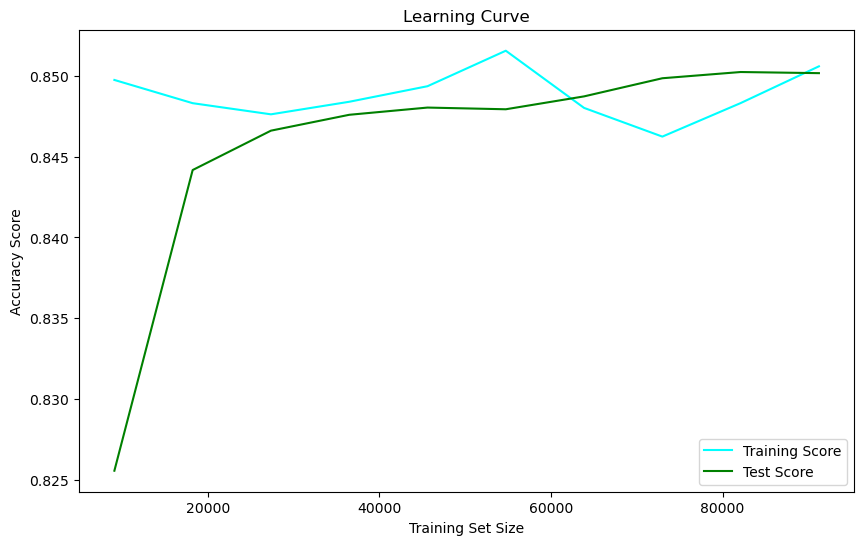

In [55]:
#curvas de aprendijae para detectar el sobreajuste
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', color='cyan')  # Linea de entrenamiento en celeste
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Score', color='green')  # Linea de prueba en verde
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [56]:
importances = classifier.feature_importances_
feature_names = X.columns

feature_importance = dict(zip(feature_names, importances))
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

Edad: 0.9038536998152495
EstadoCivil: 0.06433445829563778
area: 0.01130148665495874
ingr_per: 0.010302833490924777
Sexo: 0.008967319156141447
RelacionParentesco: 0.0009342015563262259
Como_se_considera: 0.000306001030761451


In [57]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, recall_score

# División aleatoria consistente para el conjunto de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Realizar validación cruzada con 5 divisiones (k=5) en el conjunto de entrenamiento
train_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy en entrenamiento para cada división:", train_scores)
print("Accuracy promedio en entrenamiento:", train_scores.mean())

# Realizar validación cruzada con 5 divisiones (k=5) en el conjunto de prueba
test_scores = cross_val_score(classifier, X_test, y_test, cv=5, scoring='accuracy')
print("Accuracy en prueba para cada división:", test_scores)
print("Accuracy promedio en prueba:", test_scores.mean())

# Calcular el recall en ambos conjuntos
train_recall = recall_score(y_train, classifier.predict(X_train))
test_recall = recall_score(y_test, classifier.predict(X_test))

print("Recall en entrenamiento:", train_recall)
print("Recall en prueba:", test_recall)


Accuracy en entrenamiento para cada división: [0.85441151 0.85020172 0.84961703 0.84926621 0.85358438]
Accuracy promedio en entrenamiento: 0.8514161677410523
Accuracy en prueba para cada división: [0.8452903  0.84213296 0.84301    0.8452903  0.84914927]
Accuracy promedio en prueba: 0.8449745658656376
Recall en entrenamiento: 0.7812139838647714
Recall en prueba: 0.7689509675541976


In [49]:
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10, 20]
}

grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Mejores Hiperparámetros:", grid_search.best_params_)

Mejores Hiperparámetros: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


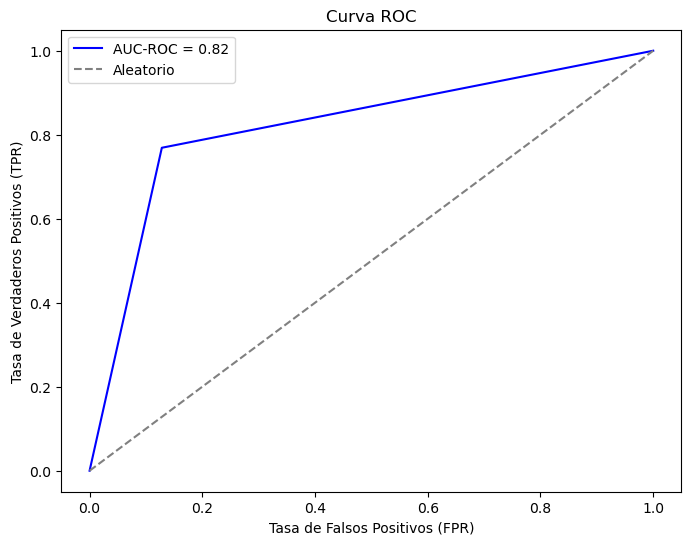

In [191]:
from sklearn.metrics import roc_auc_score, roc_curve

# Entrenar el modelo (asegúrate de ajustar los hiperparámetros según tus necesidades)
#classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
#classifier.fit(X_train, y_train)

# Obtener las etiquetas predichas para el conjunto de prueba
y_pred = classifier.predict(X_test)

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)

# Calcular la curva ROC (no será tan suave como con predict_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()


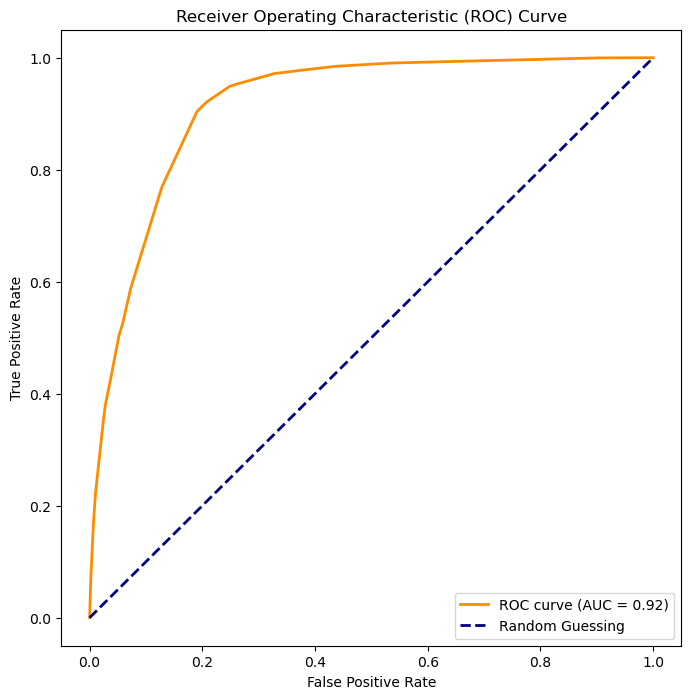

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades predichas para la clase positiva (clase 1)
y_prob = classifier.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


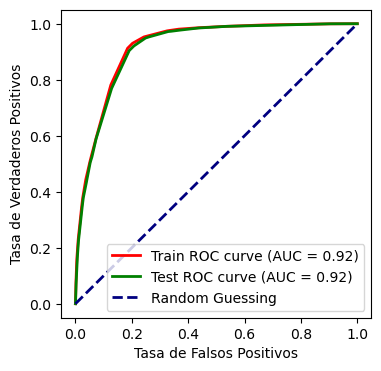

<Figure size 640x480 with 0 Axes>

In [60]:


# Obtener las probabilidades predichas para la clase positiva (clase 1) en ambos conjuntos
y_train_prob = classifier.predict_proba(X_train)[:, 1]
y_test_prob = classifier.predict_proba(X_test)[:, 1]

# Calcular las curvas ROC y el área bajo la curva (AUC) para ambos conjuntos
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)


plt.figure(figsize=(4, 4))  # Ajusta las dimensiones según sea necesario
plt.plot(fpr_train, tpr_train, color='red', lw=2, label='Train ROC curve (AUC = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='Test ROC curve (AUC = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')

plt.legend(loc='lower right')
plt.show()

plt.savefig('roc_curve_small.png', dpi=300)


In [62]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


C:\Users\csmoralesg\AppData\Local\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\csmoralesg\AppData\Local\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\csmoralesg\AppData\Local\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1fbec78ec80>


In [63]:
from IPython.display import Image
 
import pydotplus
from sklearn.preprocessing import LabelEncoder

In [64]:
from sklearn import tree

tree.export_graphviz(classifier, out_file = 'tree_social.dot')

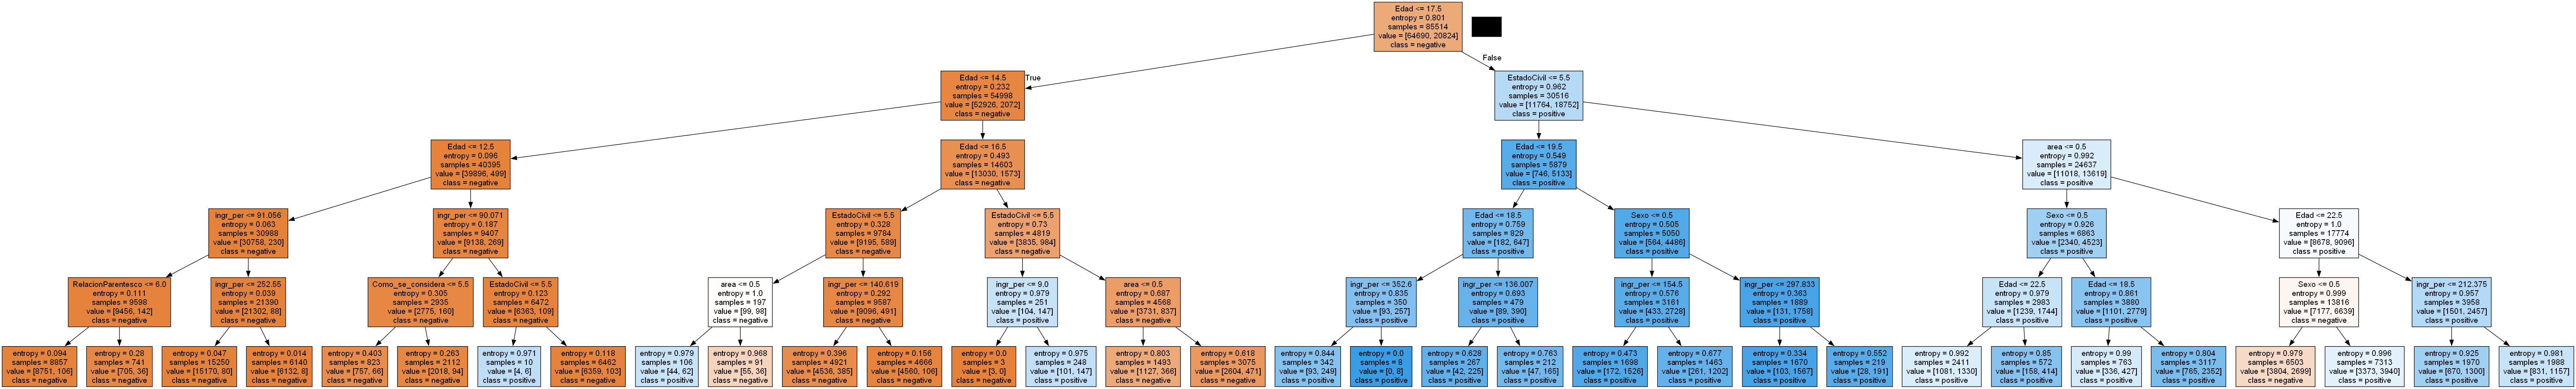

In [65]:
dot_data = tree.export_graphviz(classifier, out_file = None,class_names = ['negative', 'positive'], feature_names = list(df2.drop(['Asiste_a_clases'], axis=1)),filled= True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [66]:
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [67]:
graph.write_png("6to.png")

True

In [70]:
pip install graphviz

     -------------------------------------- 47.0/47.0 kB 261.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


sys:1: ResourceWarning:

unclosed socket <zmq.Socket(zmq.PUSH) at 0x1fbe9aa7700>

C:\Users\csmoralesg\AppData\Local\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning:

unclosed file <_io.BufferedWriter name=4>

C:\Users\csmoralesg\AppData\Local\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning:

unclosed file <_io.BufferedReader name=5>

C:\Users\csmoralesg\AppData\Local\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning:

unclosed file <_io.BufferedReader name=6>



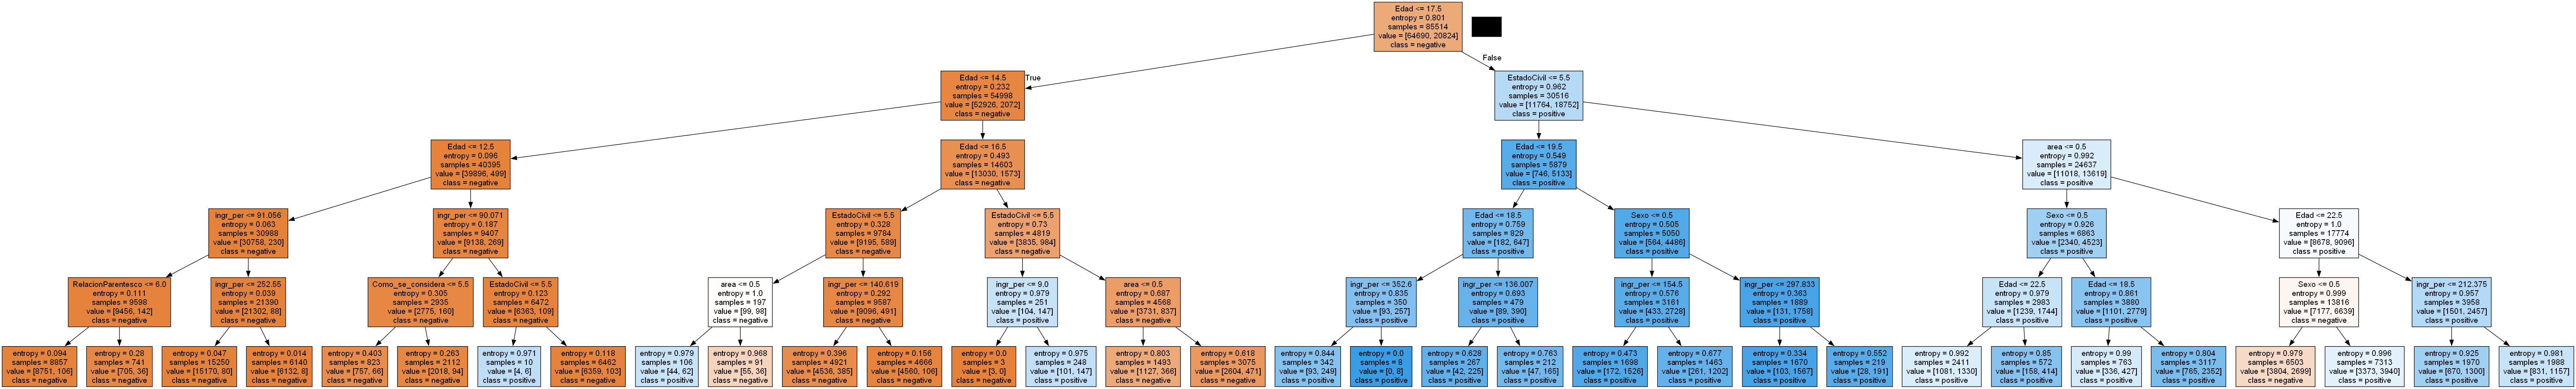

In [71]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    classifier,
    out_file=None,
    class_names=['negative', 'positive'],
    feature_names=list(df2.drop(['Asiste_a_clases'], axis=1)),
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())